<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Analysis" data-toc-modified-id="Project-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Analysis</a></span><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading Data</a></span><ul class="toc-item"><li><span><a href="#first-data-set" data-toc-modified-id="first-data-set-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>first data set</a></span></li><li><span><a href="#Second-Dataframe" data-toc-modified-id="Second-Dataframe-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Second Dataframe</a></span></li><li><span><a href="#Third-Dataset" data-toc-modified-id="Third-Dataset-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Third Dataset</a></span></li><li><span><a href="#Fourth-Dataframe" data-toc-modified-id="Fourth-Dataframe-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Fourth Dataframe</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Data-Analysis-and-Visualization" data-toc-modified-id="Data-Analysis-and-Visualization-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Analysis and Visualization</a></span></li><li><span><a href="#Final-Reflections" data-toc-modified-id="Final-Reflections-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Final Reflections</a></span></li></ul></li></ul></div>

## Project Analysis
### Loading Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
plt.style.use('seaborn-whitegrid')

#### first data set

In [2]:
#loading first data set(basics_dataset)
basics = pd.read_csv("title.basics.csv")
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
#finding rows and columns of dataset
basics.shape

(146144, 6)

In [4]:
#exploring details of data
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
#finding the null values in the dataset
basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [6]:
basics.nunique()

tconst             146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

In [7]:
#removing the first unnecessary column
basics.drop(["original_title"], axis=1, inplace=True)
basics.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
#removing second column that is unnecessary
basics.drop(["start_year"], axis=1, inplace=True)
basics.head()

,tconst,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


In [9]:
#checking for duplicates in the dataset
duplicates = basics[basics.duplicated()]
len(duplicates)

0

In [10]:
#renaming the primary title column to just title
basics.rename(columns= {"primary_title":"title"}, inplace=True)

In [11]:
#checking to see the output
basics.head()

,tconst,title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


In [12]:
#removing brackets in the title column
basics['title'] = basics['title'].str.replace(r"\(.*\)","", regex=True)
basics.tail()

,tconst,title,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,Documentary
146141,tt9916706,Dankyavar Danka,NaN,Comedy
146142,tt9916730,6 Gunn,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,NaN,Documentary


In [13]:
#removing other punctuations in the title column
basics['title'] = basics['title'].str.replace('-',"", regex=True)
basics.tail()

,tconst,title,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo O Legado de um Pioneiro,NaN,Documentary
146141,tt9916706,Dankyavar Danka,NaN,Comedy
146142,tt9916730,6 Gunn,116.0,NaN
146143,tt9916754,Chico Albuquerque Revelações,NaN,Documentary


In [14]:
#removing other punctuations in the title column
basics['title'] = basics['title'].str.replace(':',"", regex=True)
basics.head()

,tconst,title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


#### Second Dataframe

In [15]:
#loading second data set
ratings = pd.read_csv("title.ratings.csv")
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
#exploring ratings dataset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [17]:
#checking for duplicates
duplicates = ratings[basics.duplicated()]
len(duplicates)

C:\Users\Vivian\AppData\Local\Temp\ipykernel_10448\1643154197.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates = ratings[basics.duplicated()]


0

In [18]:
#finding null values in this dataset
ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

#### Third Dataset

In [19]:
#loading third dataframe bom movie gross dataset
bom = pd.read_csv("bom.movie_gross.csv")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [20]:
#exploring rows and columns of third dataset
bom.shape

(3387, 5)

In [21]:
#exploring details about third dataset
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [22]:
#finding if there are duplicates
duplicates = bom[basics.duplicated()]
len(duplicates)

C:\Users\Vivian\AppData\Local\Temp\ipykernel_10448\3451527791.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates = bom[basics.duplicated()]


0

In [23]:
#finding null values
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [24]:
#removing brackets in title column in bom dataset
bom['title'] = bom['title'].str.replace(r"\(.*\)","", regex=True)
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland,BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [25]:
#removing punctuation in the title column
bom['title'] = bom['title'].str.replace(':',"", regex=True)
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland,BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [26]:
#removing punctuctuations from the third dataset from the title column
bom['title'] = bom['title'].str.replace('-',"", regex=True)
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland,BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [27]:
#merging the basics and ratings dataset using an inner join
df = pd.merge(basics, ratings, on="tconst", how="inner")
df.head()

,tconst,title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119


In [28]:
#merging the newly created dataframe with the bom dataframe using an innerjoin
df = pd.merge(df, bom, on = "title", how="inner")
df.head()

,tconst,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [29]:
#setting new idex as tconst
df.set_index("tconst", inplace=True)
df.head()

,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
tconst,,,,,,,,,
tt0315642,Wazir,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
tt4339118,On the Road,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
tt5647250,On the Road,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [30]:
#exploring details of merged dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3046 entries, tt0315642 to tt9151704
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3046 non-null   object 
 1   runtime_minutes  2999 non-null   float64
 2   genres           3039 non-null   object 
 3   averagerating    3046 non-null   float64
 4   numvotes         3046 non-null   int64  
 5   studio           3043 non-null   object 
 6   domestic_gross   3024 non-null   float64
 7   foreign_gross    1844 non-null   object 
 8   year             3046 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 238.0+ KB


In [31]:
#removing duplicates from the dataframe
df.drop_duplicates(subset=["title"], inplace=True)

In [32]:
df.head()

,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
tconst,,,,,,,,,
tt0315642,Wazir,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015


In [33]:
#removing unnecessary column named numvotes
df.drop(["numvotes"], axis=1, inplace=True)
df.head()

,title,runtime_minutes,genres,averagerating,studio,domestic_gross,foreign_gross,year
tconst,,,,,,,,
tt0315642,Wazir,103.0,"Action,Crime,Drama",7.1,Relbig.,1100000.0,NaN,2016
tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,744000.0,8000000,2012
tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,129900000,2013
tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,26300000.0,26900000,2014
tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,"1,019.4",2015


#### Fourth Dataframe

In [34]:
#loading fourth dataset for movie budgets
budgets = pd.read_csv("tn.movie_budgets.csv", index_col=0)
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [35]:
#exploring the rows, columns and null values in budgets dataset
budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [39]:
#checking if there are any zero values in this column
zero_count= (budgets["production_budget"] == 0).sum()
zero_count

0

In [40]:
#checking if there are any zero values in this column
zero_count1= (budgets["domestic_gross"] == 0).sum()
zero_count1

0

In [41]:
#checking if there are any zero values in this column
zero_count2= (budgets["worldwide_gross"] == 0).sum()
zero_count2

0

In [36]:
#changing the name of the movie column to title
budgets.rename(columns= {"movie":"title"}, inplace=True)
budgets.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [42]:
#merging all the four datasets together
df = pd.merge(df, budgets, on = "title", how="inner")
df.head()

,title,runtime_minutes,genres,averagerating,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,744000.0,8000000,2012,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,129900000,2013,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,26300000.0,26900000,2014,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587"
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,"1,019.4",2015,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,13100000.0,10800000,2011,"Oct 28, 2011","$45,000,000","$13,109,815","$21,544,732"


In [43]:
#exploring the details of the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1057 non-null   object 
 1   runtime_minutes    1048 non-null   float64
 2   genres             1056 non-null   object 
 3   averagerating      1057 non-null   float64
 4   studio             1057 non-null   object 
 5   domestic_gross_x   1056 non-null   float64
 6   foreign_gross      904 non-null    object 
 7   year               1057 non-null   int64  
 8   release_date       1057 non-null   object 
 9   production_budget  1057 non-null   object 
 10  domestic_gross_y   1057 non-null   object 
 11  worldwide_gross    1057 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 107.4+ KB


In [45]:
zero_counts= (df["worldwide_gross"] == 0).sum()
zero_counts

0

###  Data Cleaning

In [46]:
#dropping unnecessary columns
df.drop(["domestic_gross_x", "foreign_gross"], axis=1, inplace=True)
df.head()

,title,runtime_minutes,genres,averagerating,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,2012,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,2013,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,2014,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587"
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,2015,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,2011,"Oct 28, 2011","$45,000,000","$13,109,815","$21,544,732"


In [47]:
#exploring details of newly merged df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1056
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1057 non-null   object 
 1   runtime_minutes    1048 non-null   float64
 2   genres             1056 non-null   object 
 3   averagerating      1057 non-null   float64
 4   studio             1057 non-null   object 
 5   year               1057 non-null   int64  
 6   release_date       1057 non-null   object 
 7   production_budget  1057 non-null   object 
 8   domestic_gross_y   1057 non-null   object 
 9   worldwide_gross    1057 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 90.8+ KB


In [48]:
#removing $ signs from production budget column to change data type
df['production_budget'] = df['production_budget'].str.replace('$',"", regex=True)
df.head()

,title,runtime_minutes,genres,averagerating,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,2012,"Mar 22, 2013","25,000,000","$720,828","$9,313,302"
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,2013,"Dec 25, 2013","91,000,000","$58,236,838","$187,861,183"
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,2014,"Sep 19, 2014","28,000,000","$26,017,685","$62,108,587"
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,2015,"Jun 12, 2015","215,000,000","$652,270,625","$1,648,854,864"
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,2011,"Oct 28, 2011","45,000,000","$13,109,815","$21,544,732"


In [49]:
#removing $ signs from domestic gross column to change datatype
df["domestic_gross_y"] = df["domestic_gross_y"].str.replace('$',"", regex=True)
df.head()

,title,runtime_minutes,genres,averagerating,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,2012,"Mar 22, 2013","25,000,000","720,828","$9,313,302"
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,2013,"Dec 25, 2013","91,000,000","58,236,838","$187,861,183"
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,2014,"Sep 19, 2014","28,000,000","26,017,685","$62,108,587"
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,2015,"Jun 12, 2015","215,000,000","652,270,625","$1,648,854,864"
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,2011,"Oct 28, 2011","45,000,000","13,109,815","$21,544,732"


In [50]:
#removing $ signs from worldwide gross column to change datatype
df["worldwide_gross"] = df["worldwide_gross"].str.replace('$',"", regex=True)
df.head()

,title,runtime_minutes,genres,averagerating,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,2012,"Mar 22, 2013","25,000,000","720,828","9,313,302"
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,2013,"Dec 25, 2013","91,000,000","58,236,838","187,861,183"
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,2014,"Sep 19, 2014","28,000,000","26,017,685","62,108,587"
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,2015,"Jun 12, 2015","215,000,000","652,270,625","1,648,854,864"
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,2011,"Oct 28, 2011","45,000,000","13,109,815","21,544,732"


In [51]:
#removing comma signs from worldwide gross column
df["worldwide_gross"] = df["worldwide_gross"].str.replace(',',"", regex=True)
df.head()

,title,runtime_minutes,genres,averagerating,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,2012,"Mar 22, 2013","25,000,000","720,828",9313302
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,2013,"Dec 25, 2013","91,000,000","58,236,838",187861183
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,2014,"Sep 19, 2014","28,000,000","26,017,685",62108587
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,2015,"Jun 12, 2015","215,000,000","652,270,625",1648854864
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,2011,"Oct 28, 2011","45,000,000","13,109,815",21544732


In [52]:
#removing comma signs from domestic gross column
df["domestic_gross_y"] = df["domestic_gross_y"].str.replace(',',"", regex=True)
df.head()

,title,runtime_minutes,genres,averagerating,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,2012,"Mar 22, 2013","25,000,000",720828,9313302
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,2013,"Dec 25, 2013","91,000,000",58236838,187861183
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,2014,"Sep 19, 2014","28,000,000",26017685,62108587
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,2015,"Jun 12, 2015","215,000,000",652270625,1648854864
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,2011,"Oct 28, 2011","45,000,000",13109815,21544732


In [53]:
#removing comma signs from production budget column
df['production_budget'] = df['production_budget'].str.replace(',',"", regex=True)
df.head()

,title,runtime_minutes,genres,averagerating,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,2012,"Mar 22, 2013",25000000,720828,9313302
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,2013,"Dec 25, 2013",91000000,58236838,187861183
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,2014,"Sep 19, 2014",28000000,26017685,62108587
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,2015,"Jun 12, 2015",215000000,652270625,1648854864
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,2011,"Oct 28, 2011",45000000,13109815,21544732


In [54]:
#converting domestic gross and world wide gross into numerical datatype
df[["production_budget", "domestic_gross_y", "worldwide_gross"]] = df[["production_budget","domestic_gross_y", "worldwide_gross"]].apply(pd.to_numeric)

In [55]:
#checking dataframe details to confirm three columns are now numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1056
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1057 non-null   object 
 1   runtime_minutes    1048 non-null   float64
 2   genres             1056 non-null   object 
 3   averagerating      1057 non-null   float64
 4   studio             1057 non-null   object 
 5   year               1057 non-null   int64  
 6   release_date       1057 non-null   object 
 7   production_budget  1057 non-null   int64  
 8   domestic_gross_y   1057 non-null   int64  
 9   worldwide_gross    1057 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 90.8+ KB


In [56]:
#removing the unnecessary columns
df.drop(["release_date"], axis=1, inplace=True)
df.head()

,title,runtime_minutes,genres,averagerating,studio,year,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,2012,25000000,720828,9313302
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,2013,91000000,58236838,187861183
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,2014,28000000,26017685,62108587
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,2015,215000000,652270625,1648854864
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,2011,45000000,13109815,21544732


In [57]:
#renaming a few more columns for uniformity
df.rename(columns= {"domestic_gross_y":"domestic_gross", "averagerating":"average_rating"}, inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1056
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1057 non-null   object 
 1   runtime_minutes    1048 non-null   float64
 2   genres             1056 non-null   object 
 3   average_rating     1057 non-null   float64
 4   studio             1057 non-null   object 
 5   year               1057 non-null   int64  
 6   production_budget  1057 non-null   int64  
 7   domestic_gross     1057 non-null   int64  
 8   worldwide_gross    1057 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 82.6+ KB


C:\Users\Vivian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime_minutes'>

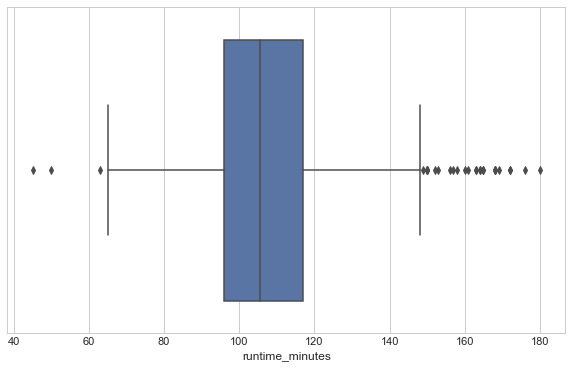

In [59]:
#using a boxplot to determine how to deal with missing values
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df.runtime_minutes)

In [60]:
#The presence of outliers means that mean is not a viable measure of central tendency to use to replace
#missing values.

In [61]:
#replacing missing values in runtime column with median since it is a numerical column
df["runtime_minutes"].fillna(df["runtime_minutes"].median(), inplace=True)

In [62]:
#replacing one missing value in genres column
df["genres"].fillna(method="ffill", inplace=True)

In [63]:
#final check to see if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1056
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1057 non-null   object 
 1   runtime_minutes    1057 non-null   float64
 2   genres             1057 non-null   object 
 3   average_rating     1057 non-null   float64
 4   studio             1057 non-null   object 
 5   year               1057 non-null   int64  
 6   production_budget  1057 non-null   int64  
 7   domestic_gross     1057 non-null   int64  
 8   worldwide_gross    1057 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 82.6+ KB


### Data Analysis and Visualization

In [64]:
df.head()

,title,runtime_minutes,genres,average_rating,studio,year,production_budget,domestic_gross,worldwide_gross
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,2012,25000000,720828,9313302
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,2013,91000000,58236838,187861183
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,2014,28000000,26017685,62108587
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,2015,215000000,652270625,1648854864
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,2011,45000000,13109815,21544732


In [65]:
#creating a new column for total gross earnings
df["total_gross_earnings"]= df["domestic_gross"]+ df["worldwide_gross"]
df.head()

,title,runtime_minutes,genres,average_rating,studio,year,production_budget,domestic_gross,worldwide_gross,total_gross_earnings
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,2012,25000000,720828,9313302,10034130
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,2013,91000000,58236838,187861183,246098021
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,2014,28000000,26017685,62108587,88126272
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,2015,215000000,652270625,1648854864,2301125489
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,2011,45000000,13109815,21544732,34654547


In [66]:
#creating a new column for profit eanned
df["Profit"]= df["total_gross_earnings"] - df["production_budget"]
df.head()

,title,runtime_minutes,genres,average_rating,studio,year,production_budget,domestic_gross,worldwide_gross,total_gross_earnings,Profit
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,IFC,2012,25000000,720828,9313302,10034130,-14965870
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,Fox,2013,91000000,58236838,187861183,246098021,155098021
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,Uni.,2014,28000000,26017685,62108587,88126272,60126272
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,Uni.,2015,215000000,652270625,1648854864,2301125489,2086125489
4,The Rum Diary,119.0,"Comedy,Drama",6.2,FD,2011,45000000,13109815,21544732,34654547,-10345453


In [67]:
#statistics for numerical columns
df.describe()

,runtime_minutes,average_rating,year,production_budget,domestic_gross,worldwide_gross,total_gross_earnings,Profit
count,1057.000000,1057.000000,1057.000000,1.057000e+03,1.057000e+03,1.057000e+03,1.057000e+03,1.057000e+03
mean,107.941816,6.455629,2013.575213,4.300113e+07,5.586048e+07,1.347325e+08,1.905929e+08,1.475918e+08
std,17.279117,0.955471,2.497778,5.015104e+07,7.739784e+07,2.065596e+08,2.802398e+08,2.464346e+08
min,45.000000,2.900000,2010.000000,5.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-8.905748e+07
25%,96.000000,5.900000,2011.000000,1.000000e+07,7.388654e+06,1.738269e+07,2.569616e+07,9.170810e+06
50%,105.500000,6.500000,2013.000000,2.500000e+07,3.117755e+07,6.103193e+07,9.424090e+07,6.209322e+07
75%,117.000000,7.100000,2016.000000,5.100000e+07,7.001285e+07,1.589053e+08,2.348144e+08,1.735859e+08
max,180.000000,9.200000,2018.000000,3.000000e+08,7.000596e+08,1.648855e+09,2.301125e+09,2.086125e+09


In [68]:
#grouping data bu genres and finding average profit to plot graph
profit_topgenres = pd.DataFrame(df.groupby("genres")["Profit"].mean().sort_values(ascending=False).head(5))
profit_topgenres

,Profit
genres,
"Adventure,Drama,Sport",1.523208e+09
"Comedy,Mystery",7.609286e+08
"Adventure,Drama,Sci-Fi",7.325512e+08
"Action,Adventure,Animation",6.011790e+08
"Action,Adventure,Sci-Fi",5.665843e+08


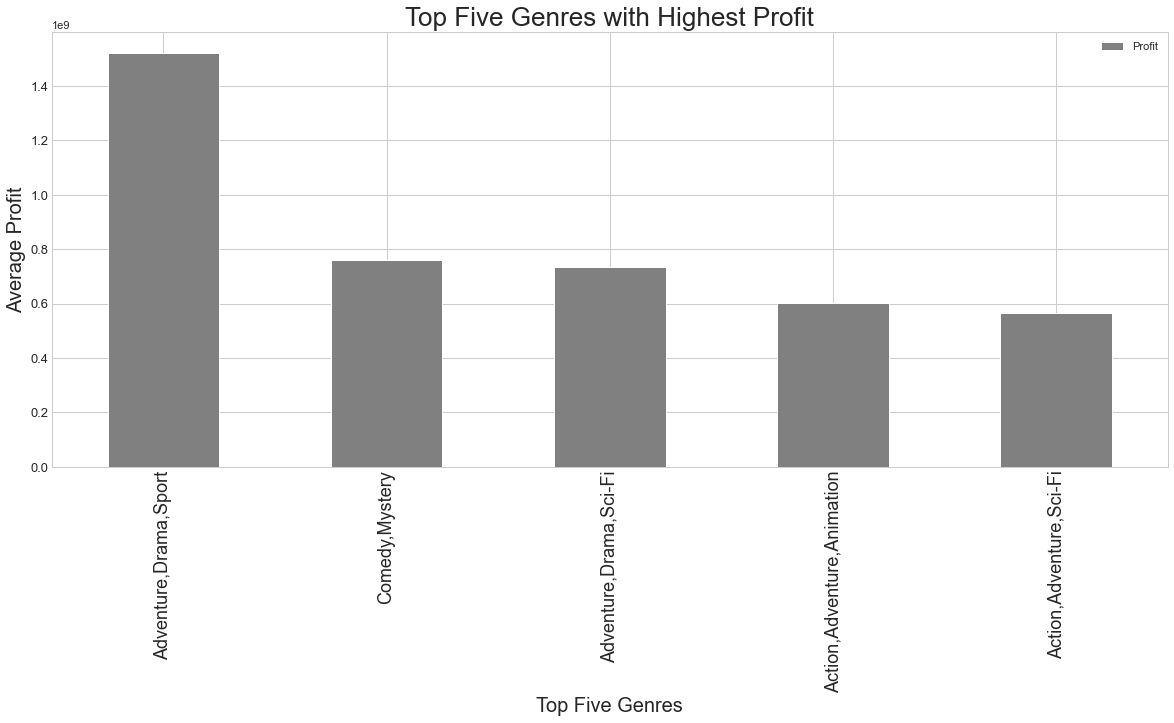

In [69]:
#plotting bar graph of top five genres with highest profit
ax = profit_topgenres.plot(kind='bar', figsize=(20,8), color="grey", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Top Five Genres with Highest Profit", fontsize=26)
ax.set_ylabel("Average Profit", fontsize=20);
ax.set_xlabel("Top Five Genres", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("output.jpg")
plt.show()

In [70]:
#finding the top 5 genres that have the highest budget
budget_topgenres = pd.DataFrame(df.groupby("genres")["production_budget"].mean().sort_values(ascending=False).head(5))
budget_topgenres

,production_budget
genres,
"Adventure,Fantasy",1.950000e+08
"Action,Sci-Fi",1.780000e+08
"Action,Adventure,Sci-Fi",1.507273e+08
"Adventure,Drama,Sport",1.500000e+08
"Action,Adventure,Animation",1.418182e+08


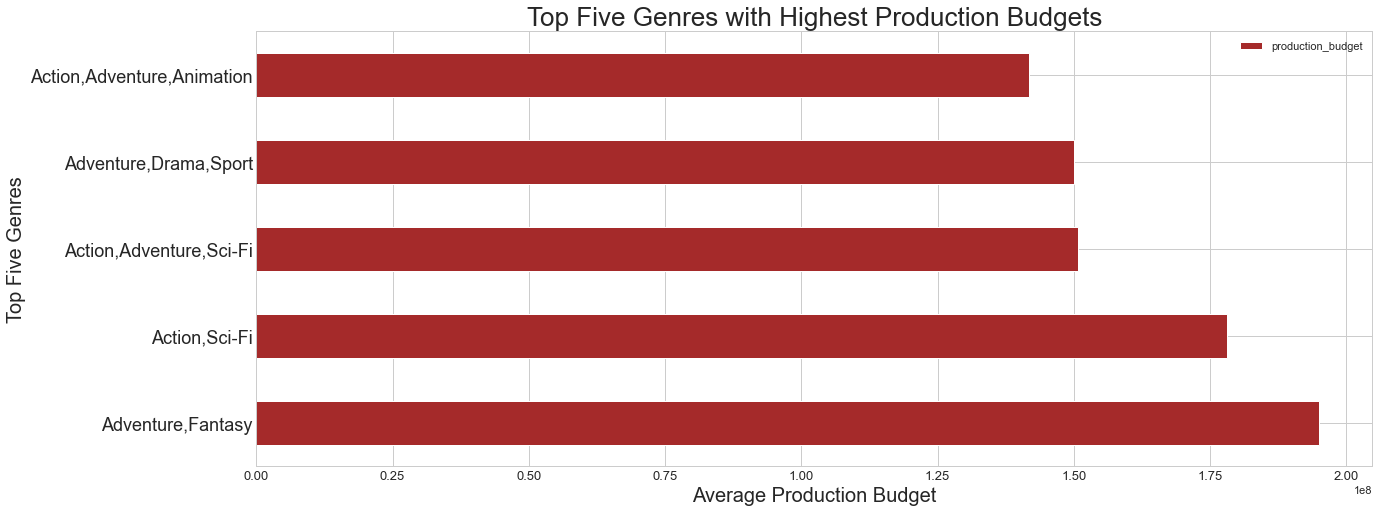

In [71]:
#finding top five genres with highest production budgets
ax = budget_topgenres.plot(kind='barh', figsize=(20,8), color="brown", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Top Five Genres with Highest Production Budgets", fontsize=26)
ax.set_xlabel("Average Production Budget", fontsize=20);
ax.set_ylabel("Top Five Genres", fontsize=20)
plt.yticks(fontsize= 18)
plt.savefig("genresbudgets.jpg")
plt.show()

In [72]:
#Adventure, fantasy and action, sci-fi seem to have the highest average production budgets.

In [73]:
#finding the average domestic gross for the top five genres
top_genres = pd.DataFrame(df.groupby("genres")["domestic_gross"].mean().sort_values(ascending=False).head(5))
top_genres

,domestic_gross
genres,
"Adventure,Drama,Sport",4.007380e+08
"Comedy,Mystery",2.544643e+08
"Adventure,Drama,Sci-Fi",2.082258e+08
"Action,Adventure,Sci-Fi",2.043117e+08
"Action,Adventure,Animation",1.909025e+08


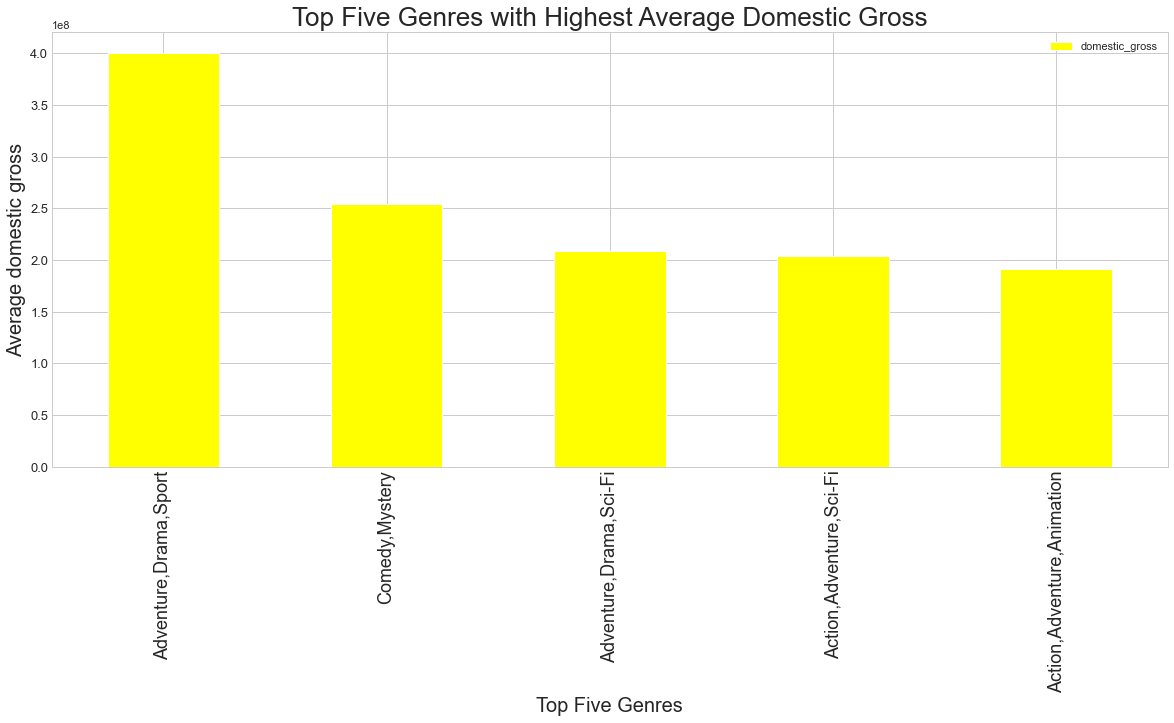

In [74]:
#creating bar plot for top five genres with highest domestic gross
ax = top_genres.plot(kind='bar', figsize=(20,8), color="yellow", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top Five Genres with Highest Average Domestic Gross", fontsize=26)
ax.set_ylabel("Average domestic gross", fontsize=20);
ax.set_xlabel("Top Five Genres", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("genresdomestic.jpg")
plt.show()

In [75]:
#reflection
#The most popular and profitable genre domestically is Adventure,Drama,Sport followed by Comedy,Mystery

In [76]:
#finding the average worldwide gross for the top five genres
top_genres_foreign = pd.DataFrame(df.groupby("genres")["worldwide_gross"].mean().sort_values(ascending=False).head(5))
top_genres_foreign

,worldwide_gross
genres,
"Adventure,Drama,Sport",1.272470e+09
"Adventure,Drama,Sci-Fi",6.608254e+08
"Comedy,Mystery",5.864643e+08
"Action,Adventure,Animation",5.520947e+08
"Action,Adventure,Sci-Fi",5.129999e+08


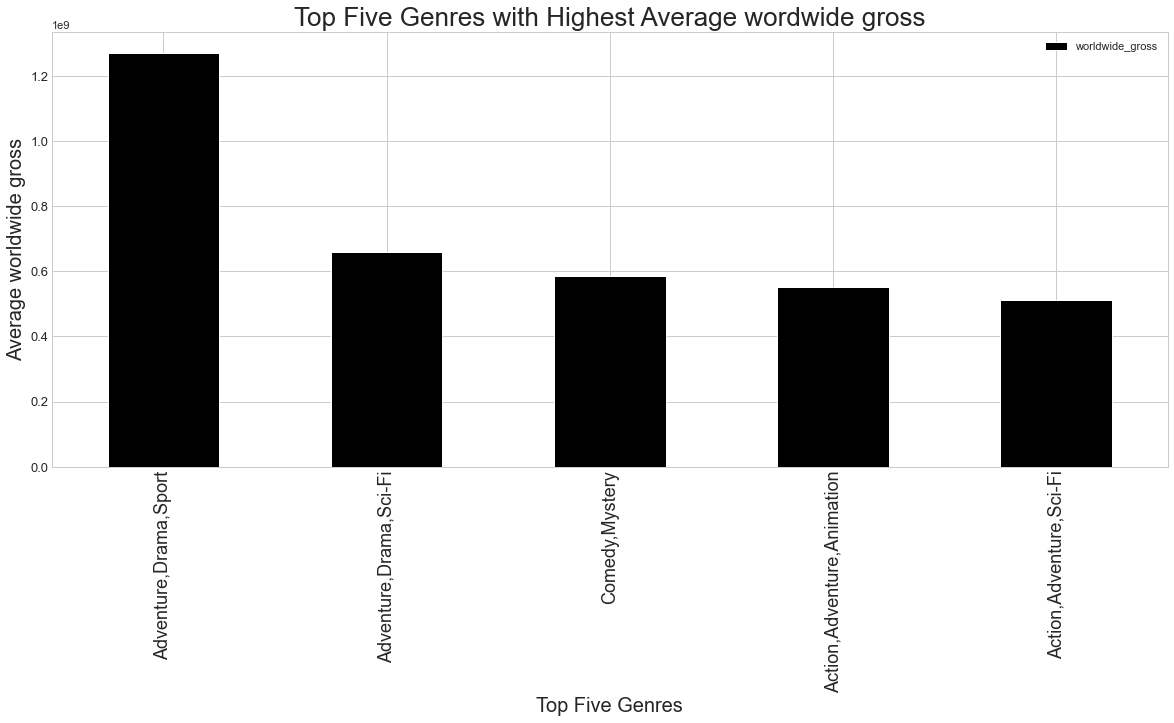

In [77]:
ax = top_genres_foreign.plot(kind='bar', figsize=(20,8), color="black", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top Five Genres with Highest Average wordwide gross", fontsize=26)
ax.set_ylabel("Average worldwide gross", fontsize=20);
ax.set_xlabel("Top Five Genres", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("genresworld.jpg")
plt.show()

In [78]:
#reflection
#The most popular and profitable genre domestically is Adventure,Drama,Sport 
#followed by Adventure,Drama,Sci-Fi
#However, it is evident that the top five genres are similar domestically and worldwide

In [79]:
#finding the average production budget of studios
new_df = pd.DataFrame(df.groupby("studio")["production_budget"].mean().sort_values(ascending=False).head(5))
new_df

,production_budget
studio,
P/DW,1.242500e+08
BV,1.126596e+08
WB,7.598539e+07
Sony,6.462500e+07
Fox,6.384337e+07


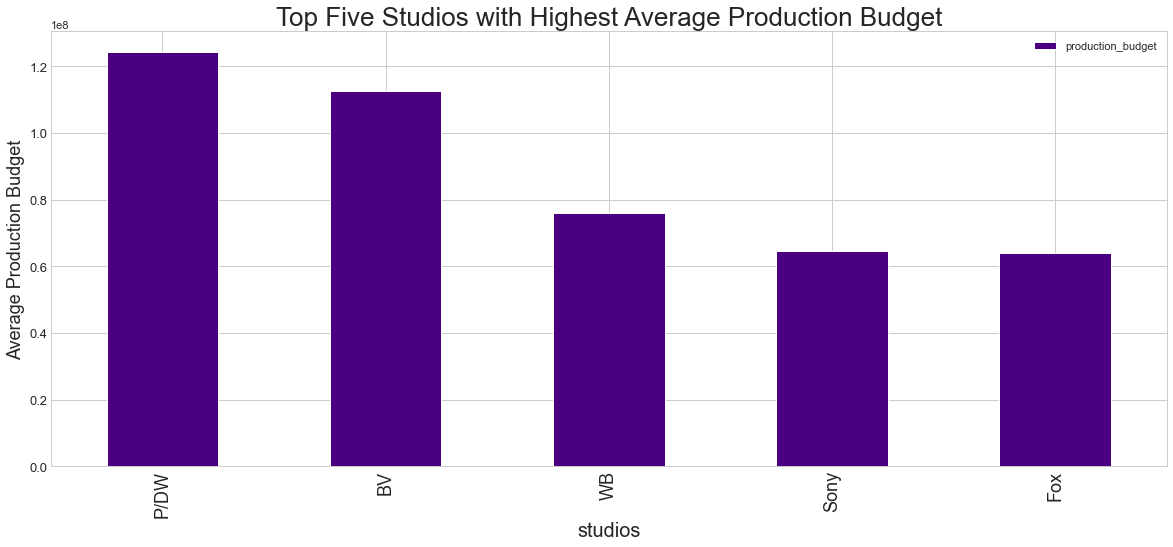

In [80]:
#finding the top studios with highest average production budget to figure out trends in the industry and competitor
ax = new_df.plot(kind='bar', figsize=(20,8), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top Five Studios with Highest Average Production Budget", fontsize=26)
ax.set_ylabel("Average Production Budget", fontsize=18);
ax.set_xlabel("studios", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("studiosbudget.jpg")
plt.show()

In [81]:
#Reflection
#P/DW and BV have the largest production budgets

In [82]:
#finding the average domestic gross for top five studios
new2_df = pd.DataFrame(df.groupby("studio")["domestic_gross"].mean().sort_values(ascending=False).head(5))
new2_df

,domestic_gross
studio,
BV,1.530178e+08
P/DW,1.392666e+08
Uni.,9.153088e+07
WB,8.798674e+07
Fox,8.545552e+07


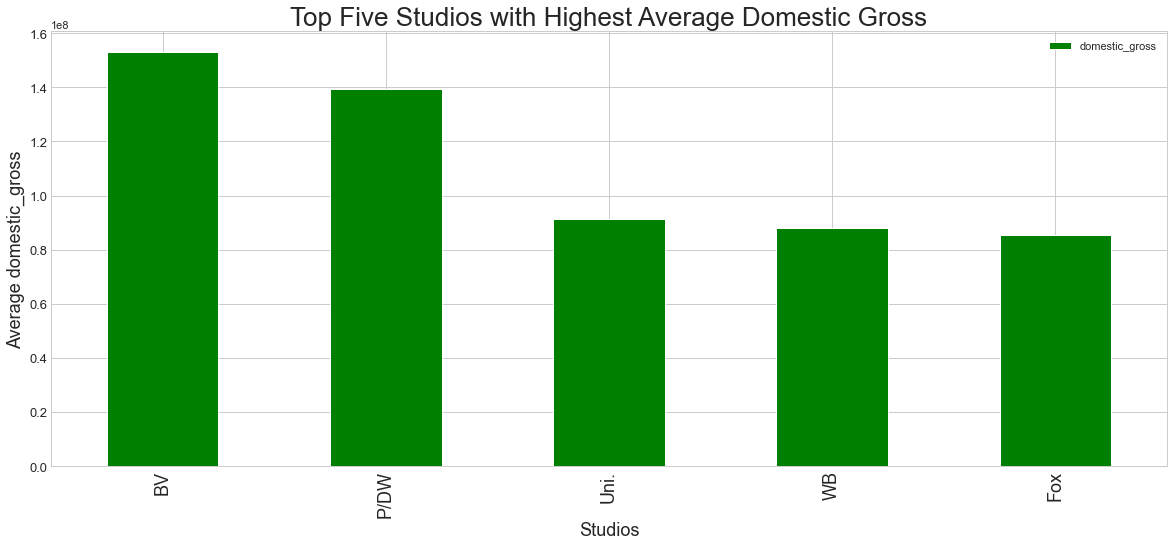

In [83]:
#finding the top 5 studios with highest average domestic gross to figure out trends in the industry and competitor
ax = new2_df.plot(kind='bar', figsize=(20,8), color="green", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top Five Studios with Highest Average Domestic Gross", fontsize=26)
ax.set_ylabel("Average domestic_gross", fontsize=18);
ax.set_xlabel("Studios", fontsize=18);
plt.xticks(fontsize= 18)
plt.show()

In [84]:
#Reflection
#BV and P/DW earned the highest domestic gross in the box office

In [85]:
# finding average worldwide gross for top five studios
new3_df = pd.DataFrame(df.groupby("studio")["worldwide_gross"].mean().sort_values(ascending=False).head(5))
new3_df

,worldwide_gross
studio,
P/DW,4.009145e+08
BV,3.748287e+08
Uni.,2.337557e+08
Fox,2.288845e+08
Sony,2.093976e+08


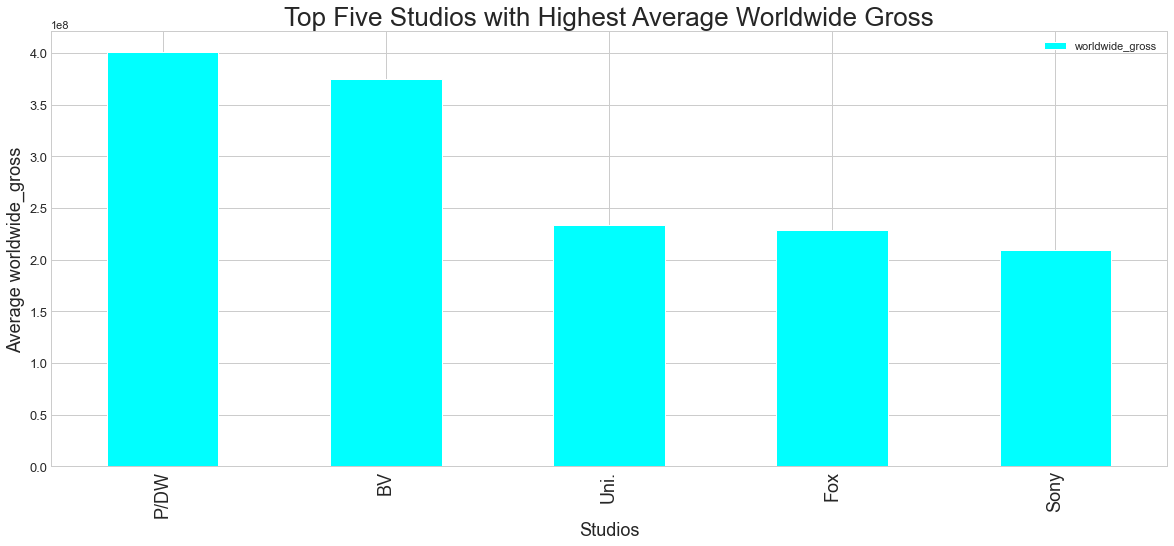

In [86]:
#finding top5 studios with highest average worldwide gross 
ax = new3_df.plot(kind='bar', figsize=(20,8), color="cyan", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top Five Studios with Highest Average Worldwide Gross", fontsize=26)
ax.set_ylabel("Average worldwide_gross", fontsize=18);
ax.set_xlabel("Studios", fontsize=18);
plt.xticks(fontsize= 18)
plt.show()

In [87]:
#Reflection
#P/DW earned the highest worldwide gross in the box office but second largest domestically while
#BV earned highest domestic gross but second highest worldwide gross.
#The same top five studios are dominating the industry both domestically and worldwide.

In [88]:
# finding average worldwide gross for top five studios
new4_df = pd.DataFrame(df.groupby("studio")["Profit"].mean().sort_values(ascending=False).head(5))
new4_df

,Profit
studio,
P/DW,4.159311e+08
BV,4.151868e+08
Uni.,2.673922e+08
Fox,2.504967e+08
Sony,2.300331e+08


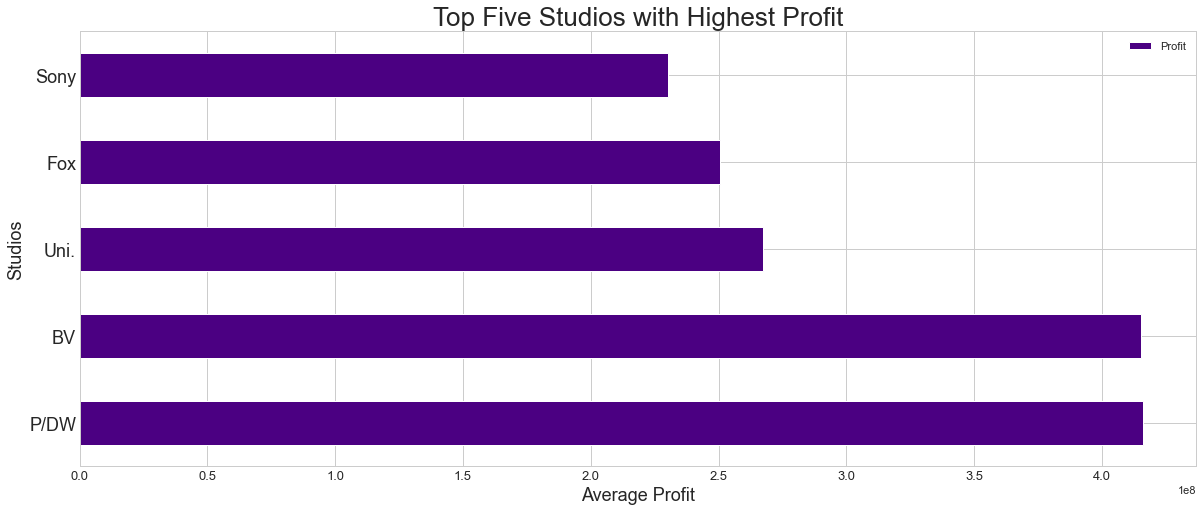

In [89]:
#finding top5 studios with highest Profits 
ax = new4_df.plot(kind='barh', figsize=(20,8), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top Five Studios with Highest Profit", fontsize=26)
ax.set_xlabel("Average Profit", fontsize=18);
ax.set_ylabel("Studios", fontsize=18);
plt.yticks(fontsize= 18)
plt.savefig("studiosproft.jpg")
plt.show()

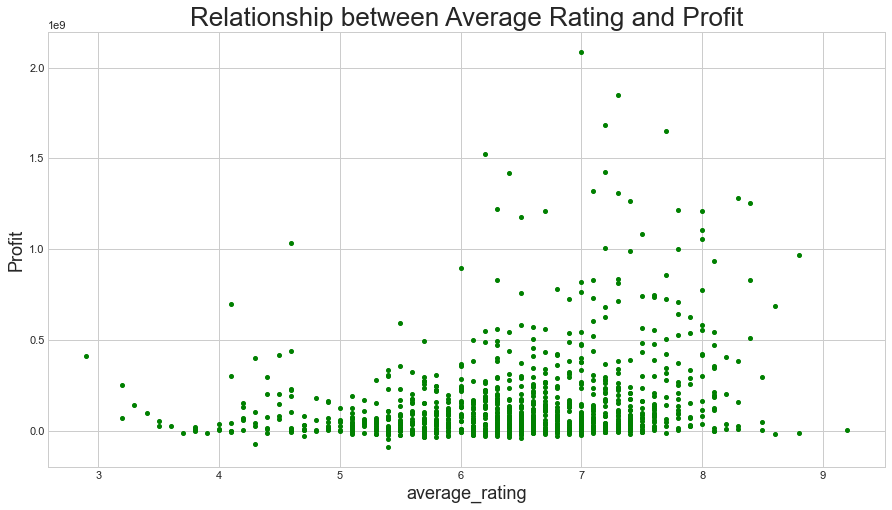

In [90]:
#checking on the correlation between average_rating and profit
plt.plot(df.average_rating, df.Profit,'o',markersize=4, color='green')
plt.xlabel('average_rating', fontsize=18)
plt.ylabel('Profit', fontsize=18)
plt.title("Relationship between Average Rating and Profit", fontsize=26)
plt.savefig("ratingprofit.jpg")

In [91]:
#reflection
#There is no correlation between average rating and domestic gross

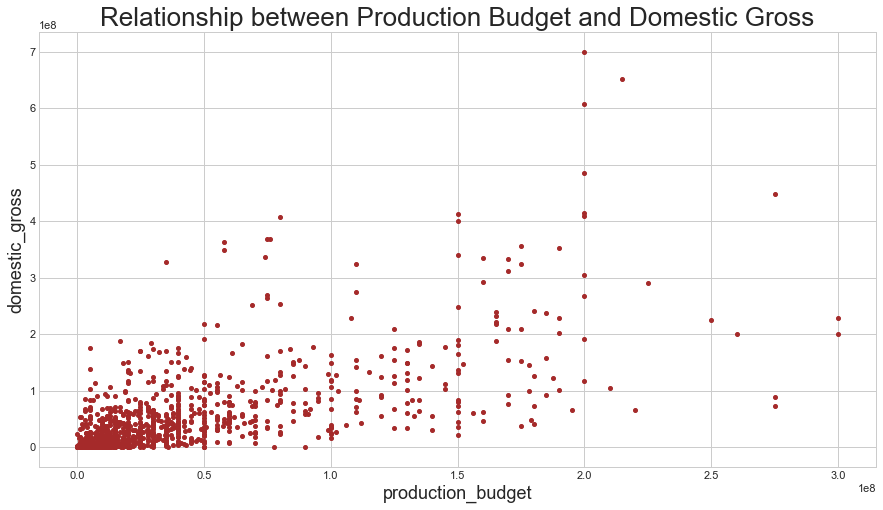

In [92]:
#checking on the correlation between production_budget and domestic gross
plt.plot(df.production_budget, df.domestic_gross,'o',markersize=4, color='brown')
plt.xlabel('production_budget', fontsize=18)
plt.ylabel('domestic_gross', fontsize=18)
plt.title("Relationship between Production Budget and Domestic Gross", fontsize=26)
plt.savefig("budgetgross.jpg")

In [93]:
#reflection
#There is a low positive correlation between production budget and domestic gross

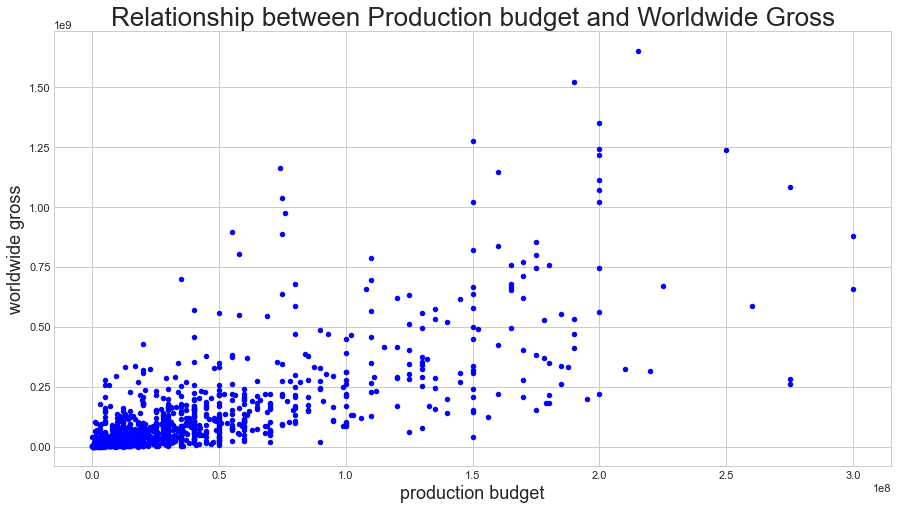

In [94]:
#finding the relationship between production budget and worldwide gross
df.plot.scatter(x= 'production_budget', y='worldwide_gross',  c=np.array(["blue"]))
plt.title("Relationship between Production budget and Worldwide Gross", fontsize=26)
plt.xlabel("production budget", fontsize= 18)
plt.ylabel("worldwide gross", fontsize = 18)
plt.savefig("budgetworld.jpg")

In [95]:
#reflection
#There is a low positive correlation between production budget and worldwide gross

Text(0.5, 1.0, 'Relationship between Production Budget and Total Gross Earnings')

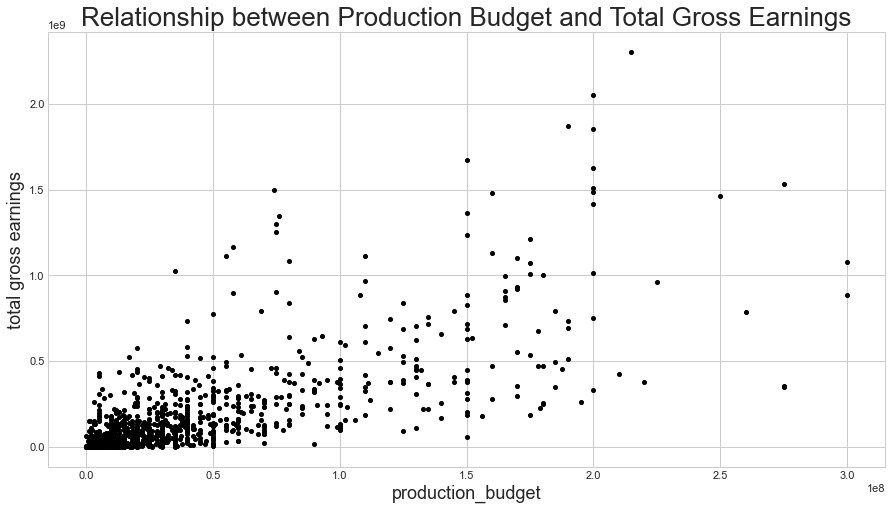

In [96]:
#checking on the correlation between production_budget and total gross earnings
plt.plot(df.production_budget, df.total_gross_earnings,'o',markersize=4, color='black')
plt.xlabel('production_budget', fontsize=18)
plt.ylabel('total gross earnings', fontsize=18)
plt.title("Relationship between Production Budget and Total Gross Earnings", fontsize=26)

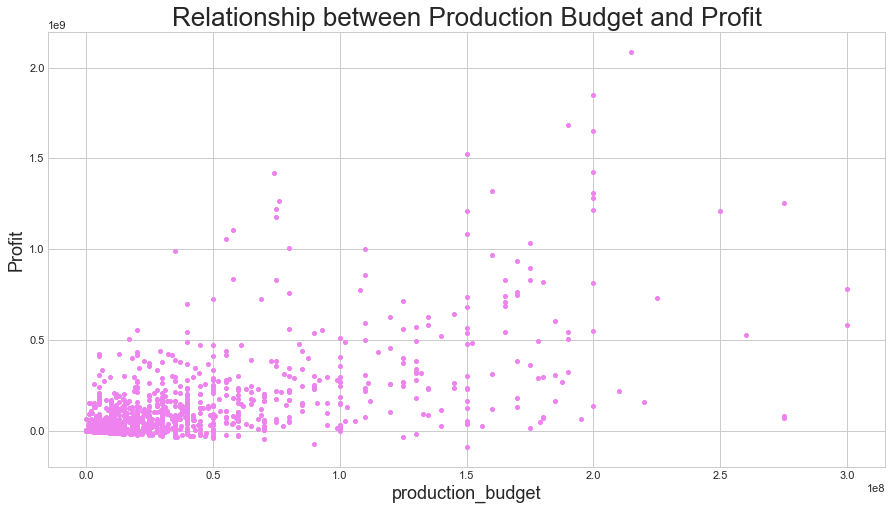

In [97]:
#checking on the correlation between production_budget and profit
plt.plot(df.production_budget, df.Profit,'o',markersize=4, color='violet')
plt.xlabel('production_budget', fontsize=18)
plt.ylabel('Profit', fontsize=18)
plt.title("Relationship between Production Budget and Profit", fontsize=26)
plt.savefig("budgetprofit.jpg")

In [98]:
#there is a very low correlation between production budget and profit

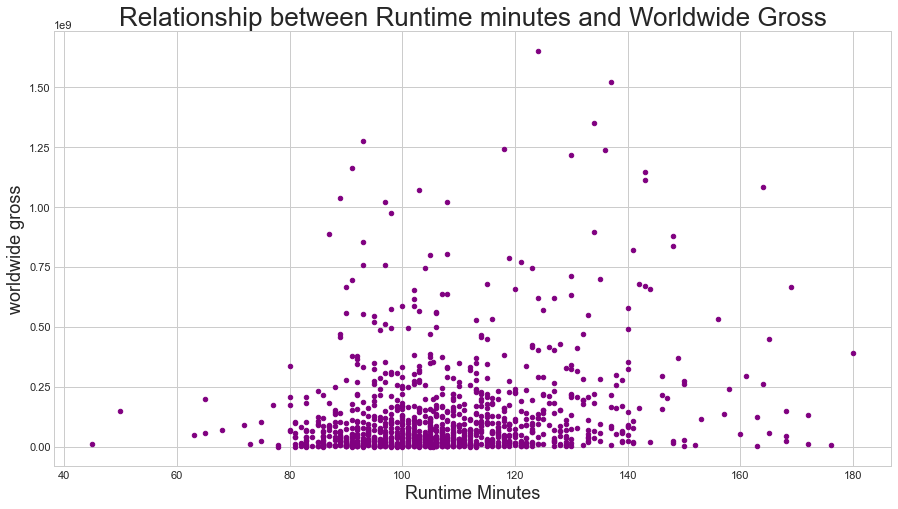

In [99]:
#finding the correlation between runtime minutes and worldwide gross
df.plot.scatter(x= 'runtime_minutes', y='worldwide_gross',  c=np.array(["purple"]))
plt.title("Relationship between Runtime minutes and Worldwide Gross", fontsize=26)
plt.xlabel("Runtime Minutes", fontsize= 18)
plt.ylabel("worldwide gross", fontsize = 18)
plt.savefig("runtimeworldwide.jpg")

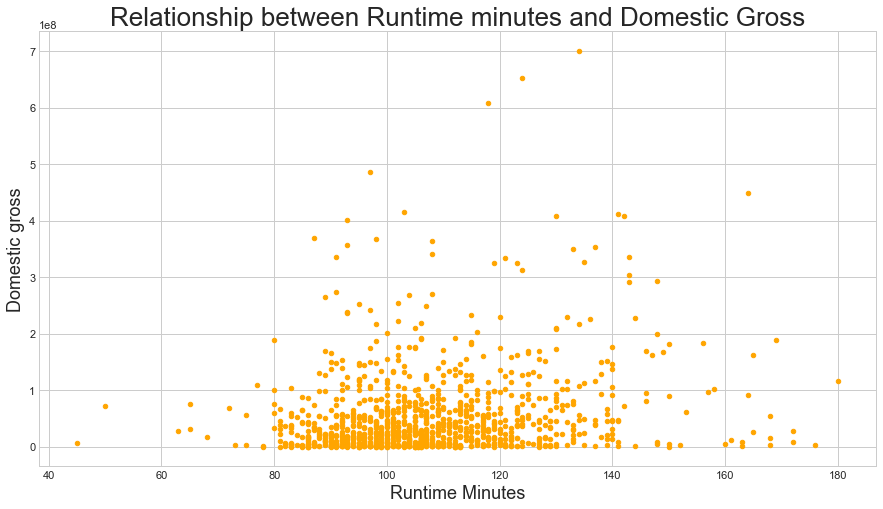

In [100]:
#finding Relationship between Runtime minutes and Domestic Gross
df.plot.scatter(x= 'runtime_minutes', y='domestic_gross',  c=np.array(["orange"]))
plt.title("Relationship between Runtime minutes and Domestic Gross", fontsize=26)
plt.xlabel("Runtime Minutes", fontsize= 18)
plt.ylabel("Domestic gross", fontsize = 18)
plt.savefig("runtimedomestic.jpg")

In [101]:
#There is no correlation between how long the movie is and the gross earnings in both domestic 
#and worldwide box office.

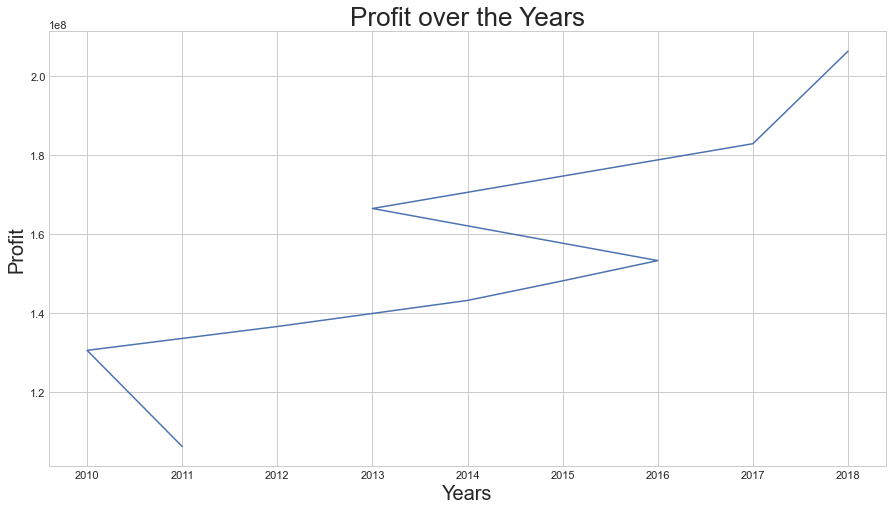

In [102]:
#finding the trend of profit over the years in the industry
plt.plot(df.groupby('year')['Profit'].mean().sort_values(ascending = False))
plt.title("Profit over the Years", fontsize=26)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Profit", fontsize=20)
plt.savefig("profitoveryears.jpg")

In [103]:
#profit has been on the incline over the years with 2018 experiencing the highest profits

Text(0, 0.5, 'Movie Releases')

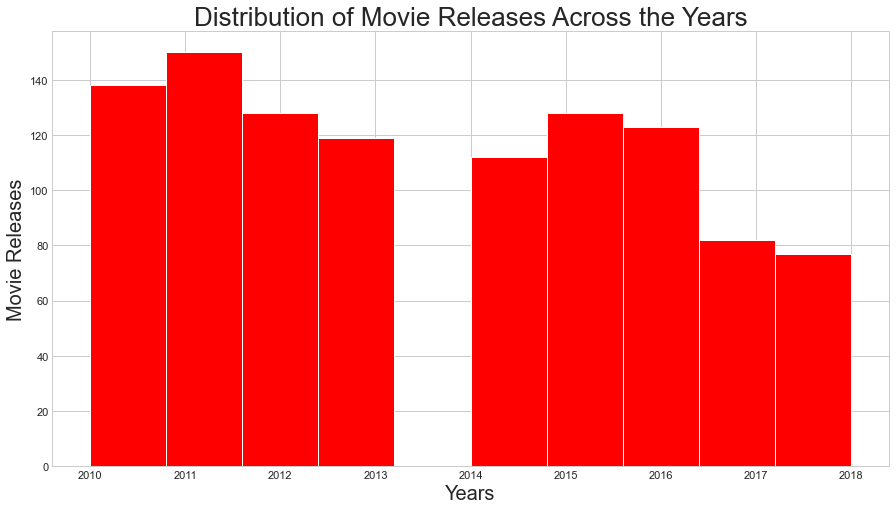

In [104]:
#checking which year had the highest releases
df["year"].plot.hist(color="red")
plt.title("Distribution of Movie Releases Across the Years", fontsize=26)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Movie Releases", fontsize=20)

In [105]:
#2011, 2015 and 2016 saw the highest releases in movies

### Final Reflections

In [106]:
#final reflections on genres
#The genres with largest budgets are adventure &fantasy and action $ scifi and action, adventure& scifi
#highest domestic gross are adventure, drama& sport and comedy, mystery and adventure,drama, scifi
#highest worldwide gross are adventure, drama, sport and adventure,drama,scifi and comedy, mystery

##Those with the highest budgets are not necessarily the highest grossing ones
##There are differences between genre preferences domestically and worldwide
##Most popular genres are those with adventure, drama, sport, comedy, mystery and scifi

In [107]:
#final reflections on factors affecting profi and gross box office earnings

## There is no relationship between runtime minutes and box office earnings
##production budget is not correlated to profits, a big budget does not mean a big profit
###ratings do not affect profit

In [108]:
#final reflections on relationship betweeen budget and gross earnings
##There is a slight positive correlation between production budget and both domestic and worldwide
##gross earnings. A small increase in budget increases gross earnings in the positive direction.
###There is a very weak to no correlation between production budgets and profit. However, since profit
### in the industry has been on the rise, opening a movie studio has potential to make profit.